# Assignment 4 #
### Due: Friday, October 27th to be submitted via Canvas by 11:59 pm ###
### Total points: **80** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 62
2. Student Names - Udit Dhand, Sanyam Jain

## Q1. (10 points) Bayes Optimal Classifier

Consider a one-dimensional dataset  $(X)$ that consists of data from three different classes - $\{c_1, c_2, c_3\}$.  Data from class $c_1$ are distributed according to $Uniform[-1,1]$, those from $c_2$ are distributed according to $Uniform[-2,2]$ and those from $c_3$ are distributed according to $Uniform[-4,4]$.
The priors for the three classes are:
$\mathbb{P} (c_1) = \frac{1}{2}$,   $\mathbb{P} (c_2) = \frac{1}{3}$,
  $\mathbb{P} (c_3) = \frac{1}{6}$.

Now, we want to build a 3-class classifier based on bayes optimal decision theory to predict the most likely label for any given data point.

a. **(2 points)** Write down the class-conditional data distributions for each of the classes defined above.

b. **(4 points)**. Derive the Bayes optimal decision boundaries for this problem.

c. **(4 points)** What is the Bayes Error rate for this classifier?

## Answer

#### Part a.

Given that data (x) for $c_1$ is distributed Uniform[-1,1], if we know that a particular datapoint belongs to class $c_1$ it is equally likely to have a value between the region [-1,1], since its uniformly distributed. The probablity density function for any uniformly distributed random variable from a to b is given by $p(x|c_1) = \frac{1}{b-a}$.

Using this formula, we find out the class-conditional data distribution probablity density functions below:

$$p(x|c_1) = \frac{1}{2}$$
$$p(x|c_2) = \frac{1}{4}$$
$$p(x|c_3) = \frac{1}{8}$$

#### Part b.

We know the prior probablities of the classes $c_1, c_2, c_3$ to be $\frac{1}{2}, \frac{1}{3}, \frac{1}{6}$ respectively.

To find the posterior probablities we use Bayes theorem:

$$ p(c_1|x) = \frac{p(c_1) p(x| c_1)}{p(x)} = \frac{\frac{1}{2}.\frac{1}{2}}{p(x)} = \frac{1}{4p(x)} \text{ for x}\in[-1,1] \text{ 0 otherwise} $$
$$ p(c_2|x) = \frac{p(c_2) p(x| c_2)}{p(x)} = \frac{\frac{1}{3}.\frac{1}{4}}{p(x)} = \frac{1}{12p(x)} \text{ for x}\in[-2,2] \text{ 0 otherwise} $$
$$ p(c_3|x) = \frac{p(c_3) p(x| c_3)}{p(x)} = \frac{\frac{1}{6}.\frac{1}{8}}{p(x)} = \frac{1}{48p(x)} \text{ for x}\in[-4,4] \text{ 0 otherwise} $$

p(x) add up to 1 over -4,4 for all classes, hence the posterior probablities are:

$$ p(c_1|x) =  \frac{1}{4} \text{ for x}\in[-1,1] \text{ 0 otherwise} $$
$$ p(c_2|x) =  \frac{1}{12} \text{ for x}\in[-2,2] \text{ 0 otherwise} $$
$$ p(c_3|x) =  \frac{1}{48} \text{ for x}\in[-4,4] \text{ 0 otherwise} $$

From the posterior probabilities above, we can see seperation of three regions forming, $[-1,1], [-2,-1)\cup(1,2], [-4,-2)\cup(2,4]$ <br>
The highest posterior probability for each region would be the predicted class in that region, i.e. $c_1 \text{ in } [-1,1], c_2 \text{ in } [-2,-1)\cup(1,2] \text{ and } c_3 [-4,-2)\cup(2,4]$


#### Part c.

Bayes Error Rate, which is the misclassification error of data, can be calculated as follows (given symmetry we calculate for [-4,0] and then double it) :

Bayes Error = $2(\int_{-4}^{-2} (p(c_1|x) + p(c_2|x)) + \int_{-2}^{-1} (p(c_1|x) + p(c_3|x)() + \int_{-1}^{0} (p(c_2|x) + p(c_3|x)) ) $ <br>
Bayes Error = $2(0 + \int_{-2}^{-1} (0 + \frac{1}{48}) + \int_{-1}^{0} (\frac{1}{12} + \frac{1}{48}) ) $ <br>
Bayes Error = $2( \frac{1}{48} + \frac{1}{12} + \frac{1}{48} ) $ <br>
Bayes Error = $ \frac{12}{48} =0.25  $

## Q2. (10 points) Multi-class Logistic Regression Derivation

To use Logistic Regression for multi-class setting with K classes - $\{1,2, ... K\}$, we need to learn $K-1$ $d$-dimensional weight vectors, $\{w_1, w_2, ..., w_{K-1}\}$ which then provide the posterior probabilities for each class in the following way -

\begin{align}
  \mathbb{P} (y = k|x) =
  \begin{cases}
                                   \dfrac{exp(w_k^Tx)}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for }k \in [1,K-1] \\
                                   \dfrac{1}{1 + \sum_{i=1}^{K-1}exp(w_i^Tx)} & \text{for } k = K
  \end{cases}
\end{align}

Suppose you are given a dataset $(X,Y)$ consisting of $N$ data-points where each $x$ is in $d$-dimensions, and $y \in [1, 2, ... K]$.

a. **(3 points)** Write down the total conditional likelihood of observing the corresponding y's for the given x's in the dataset, under the model specified above.

b. **(7 points)** Derive the update equation for any $w_i$ that can be used to learn $w_i$ via gradient descent.

## Q3. (25 points) Introduction to PyTorch

In this exercise, you will be introduced to PyTorch through an example on SVHN (Street View House Numbers) classification.
If you want to run it locally, please check out this [link](https://pytorch.org/get-started/locally/) to install PyTorch. Otherwise, you can just use Google Colab.

Here is a [tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) for you to quickly to get familiar with PyTorch and finish the problems below.



In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sn
import pandas as pd

a. **(5 points)** Load the SVHN dataset from torchvision.datasets with the transform specified below and show the first 5 images of the training set.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)



In [33]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614))
        ])

# Load SVHN training and testing datasets from torchvision.datasets
### START CODE ###
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)
### END CODE ###

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/test_32x32.mat


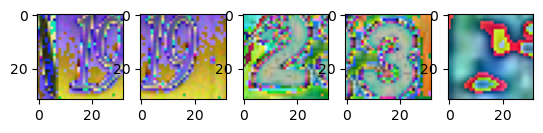

In [34]:
f, axarr = plt.subplots(1,5)
transform = torchvision.transforms.ToPILImage()
axarr[0].imshow(transform(train_dataset[0][0]))
axarr[1].imshow(transform(train_dataset[1][0]))
axarr[2].imshow(transform(train_dataset[2][0]))
axarr[3].imshow(transform(train_dataset[3][0]))
axarr[4].imshow(transform(train_dataset[4][0]))

b. **(5 points)** Split out 20% of the training set as the validation set and construct three data loaders: train_dataloader, val_dataloader, and test_dataloader. For the data loaders, set the batch sizes to 256 and set the train_dataloader to shuffled, which randomizes the mini-batch samples.

Tutorial reference:
*    [Dataset and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)







In [35]:
train_num = int(len(train_dataset) * 0.8)
val_num = len(train_dataset) - train_num
# Randomly split the training dataset into training dataset and validation dataset
### START CODE ###
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_num, val_num])

### END CODE ###


# Create data loaders
### START CODE ###
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
### END CODE ###


c. **(5 points)** Build a multiple layer perceptron with the following sequential structure:


*   Fully connected layer mapping from 32 * 32 * 3 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 50 dimensions
*   ReLU activation
*   Fully connected layer mapping from 50 dimensions to 10 dimensions

Then, create an model with the MLP class and an Adam optimizer that will be optimizing the MLP's parameters. Set the initial learning rate to be 0.001.

Tutorial reference:
*   [Build the neural network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)




In [36]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Create fully connected layers (nn.Linear)
        ### START CODE ###
        self.fc1 = nn.Linear(32*32*3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 10)
        ### END CODE ###

    def forward(self, x):
        # Flatten the input x and pass it through the neural network
        x = x.view(-1, 32*32*3)
        ### START CODE ###
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        ### END CODE ###
        return x



In [37]:
model = MLP()
# Create the optimizer
### START CODE ###
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
### END CODE ###

d. **(5 points)** Write training and evaluation subroutines per epoch (one full pass of the dataset). Then, train the model for 20 epochs using these subroutines.

Tutorial reference:
*   [Optimizing model parameters](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)



In [38]:
def train(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_num = 0
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss

    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        loss = criterion(out, target)  # Correct order of arguments
        ### END CODE ###

        # Use the optimizer to perform backpropagation
        ### START CODE ###
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ### END CODE ###

        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    return avg_loss

@torch.no_grad()
def eval(model, loader):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_num = 0
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss

    for data, target in tqdm(loader):
        out = model(data)
        # Calculate loss based on model output and target
        ### START CODE ###
        # cross entropy loss
        loss = criterion(out, target)  # Correct order of arguments
        ### END CODE ###

        # Get model's prediction
        ### START CODE ###
        pred = torch.argmax(out, dim=1)
        ### END CODE ###

        # Count number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_loss += loss.item() * batch_size
        total_num += batch_size
    avg_loss = total_loss / total_num
    acc = total_correct / total_num
    return avg_loss, acc


In [39]:
epochs = 15
for e in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer)
    val_loss, val_acc = eval(model, val_loader)
    print(f"Epoch: {e} Train Loss: {train_loss} Val Loss: {val_loss} Val Acc: {val_acc}")

  0%|          | 0/916 [00:00<?, ?it/s]

100%|██████████| 229/229 [00:01<00:00, 132.42it/s]


Epoch: 1 Train Loss: 1.2930758188511464 Val Loss: 0.9558432364509368 Val Acc: 0.7076849576849576


100%|██████████| 229/229 [00:01<00:00, 132.93it/s]


Epoch: 2 Train Loss: 0.9230157225929971 Val Loss: 0.8739062250880898 Val Acc: 0.7323232323232324


100%|██████████| 229/229 [00:01<00:00, 134.33it/s]


Epoch: 3 Train Loss: 0.8137556272565621 Val Loss: 0.8075681699777021 Val Acc: 0.7573710073710074


100%|██████████| 229/229 [00:02<00:00, 106.34it/s]


Epoch: 4 Train Loss: 0.7487739103898774 Val Loss: 0.7749727842360613 Val Acc: 0.7678815178815179


100%|██████████| 229/229 [00:01<00:00, 134.84it/s]


Epoch: 5 Train Loss: 0.7017701643937766 Val Loss: 0.7423639608282162 Val Acc: 0.7794840294840295


100%|██████████| 229/229 [00:01<00:00, 132.58it/s]


Epoch: 6 Train Loss: 0.6756846978542148 Val Loss: 0.7550325457300607 Val Acc: 0.7761397761397761


100%|██████████| 229/229 [00:01<00:00, 133.31it/s]


Epoch: 7 Train Loss: 0.6507683839384845 Val Loss: 0.7346537020113375 Val Acc: 0.7788697788697788


100%|██████████| 229/229 [00:01<00:00, 131.50it/s]


Epoch: 8 Train Loss: 0.6269442621773292 Val Loss: 0.7194814776873087 Val Acc: 0.7848075348075348


100%|██████████| 229/229 [00:01<00:00, 133.48it/s]


Epoch: 9 Train Loss: 0.6134240969030251 Val Loss: 0.7078485084855749 Val Acc: 0.7929292929292929


100%|██████████| 229/229 [00:01<00:00, 134.12it/s]


Epoch: 10 Train Loss: 0.5951811706691297 Val Loss: 0.705850899984301 Val Acc: 0.7927927927927928


100%|██████████| 229/229 [00:01<00:00, 133.86it/s]


Epoch: 11 Train Loss: 0.584767796404176 Val Loss: 0.6846992268674269 Val Acc: 0.797979797979798


100%|██████████| 229/229 [00:01<00:00, 132.74it/s]


Epoch: 12 Train Loss: 0.5680734365219936 Val Loss: 0.6896897236603776 Val Acc: 0.7948402948402948


100%|██████████| 229/229 [00:01<00:00, 134.76it/s]


Epoch: 13 Train Loss: 0.560863019195334 Val Loss: 0.66383394197854 Val Acc: 0.8050778050778051


100%|██████████| 229/229 [00:01<00:00, 134.10it/s]


Epoch: 14 Train Loss: 0.5455511834635465 Val Loss: 0.6856412411370695 Val Acc: 0.8015970515970516


100%|██████████| 229/229 [00:01<00:00, 133.48it/s]

Epoch: 15 Train Loss: 0.5431282316394536 Val Loss: 0.6633415296205952 Val Acc: 0.8065793065793065


e. **(5 points)** Evaluate your model's accuracy and confusion matrix on the test set. Print the test accuracy and plot the confusion matrix.

100%|██████████| 407/407 [00:03<00:00, 134.11it/s]


Test accuracy: 0.7783881376767056


<Axes: >

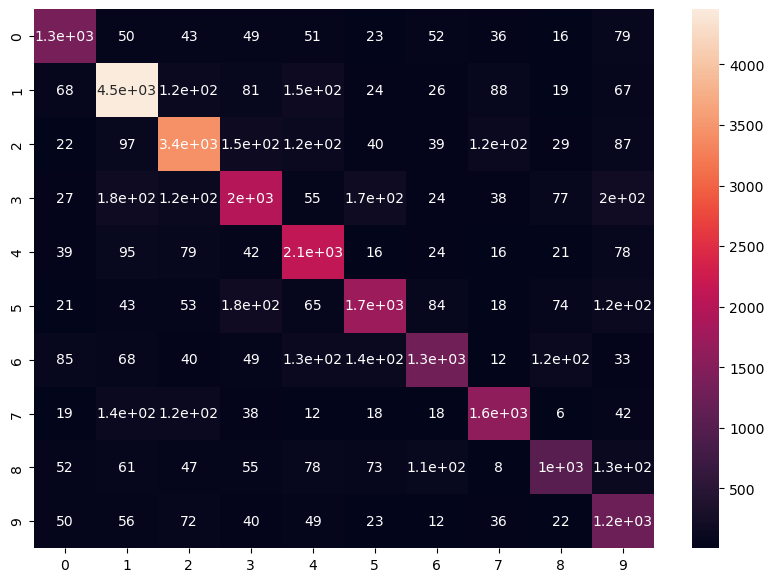

In [40]:
model.eval()
total_correct = 0
total_num = 0
all_y_true = []
all_y_pred = []
with torch.no_grad():
    for data, target in tqdm(test_loader):
        out = model(data)
        # Get model's prediction
        ### START CODE ###
        pred = torch.argmax(out, dim=1)
        ### END CODE ###

        # Get number of correct predictions
        ### START CODE ###
        correct = (pred == target).sum().item()
        ### END CODE ###

        total_correct += correct
        batch_size = len(target)
        total_num += batch_size

        # Collect target into the all_y_true list and pred into the all_y_pred list for confusion matrix
        ### START CODE ###
        all_y_true.extend(target.tolist())
        all_y_pred.extend(pred.tolist())
        ### END CODE ###

test_acc = total_correct / total_num
print(f"Test accuracy: {test_acc}")

# Obtain confusion matrix
### START CODE ###
cm = confusion_matrix(all_y_true, all_y_pred)
### END CODE ###


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                         columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Q4. (10 points) Bayesian Belief Networks

a) **(3 points)** Consider two BNNs given below. Suppose you installed two different anti-virus systems which use different algorithms for detection to efficiently detect all infections that can affect your system. Which of the following two BBNs below capture the independence assumptions of this setting correctly?

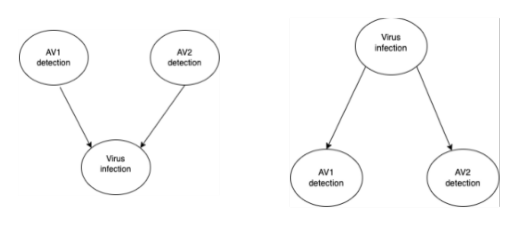

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
img_A = mpimg.imread('hwq.drawio (3).png')
img_B = mpimg.imread('hwq.drawio (4).png')

fig, ax = plt.subplots(1,2)
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)

#### Answer

The Bayesian belief networks (BBNs) depict causal relationships among variables using directed acyclic graphs.

1. In the left BBN:
   - Both "AV1 detection" and "AV2 detection" have arrows pointing to "Virus infection", suggesting that the detections are causes of the virus infection. This does not make logical sense, as the detection of a virus is a result of a virus infection, not the other way around.

2. In the right BBN:
   - "Virus infection" has arrows pointing to both "AV1 detection" and "AV2 detection", suggesting that the virus infection can lead to detections by the two anti-virus systems. This makes intuitive sense, as a virus infection would be detected by the anti-virus systems.

Given the setting where you have two different anti-virus systems to detect infections, the correct assumption would be that a virus infection leads to its detection by the anti-virus systems. Thus, the right BBN captures the independence assumptions of this setting correctly.

b) **(7 points)** From the first Bayesian network, compute $\mathbb{P}$(AV2 detection = T| AV1 detection = T , Virus infection = T). Use the following probability tables for the computation.

P(AV1 detection = T) = 0.1\
P(AV2 detection = T) = 0.2

P(Virus infection = T | AV1 detection = T, AV2 detection = T) = 0.8 \
P(Virus infection = T | AV1 detection = T, AV2 detection = F) = 0.7 \
P(Virus infection = T | AV1 detection = F, AV2 detection = T) = 0.6 \
P(Virus infection = T | AV1 detection = F, AV2 detection = F) = 0.5 

#### Answer:

Lets start with joint probablities of all three events $P(VI, AV1, AV2)$, using bayes theorem, we can expand it so that we get the term we are looking for:

$P(VI, AV1, AV2) = P(AV2 | AV1, VI) P(AV1, VI)$, rearranging we get $$ P(AV2 | AV1, VI) = \frac{P(VI, AV1, AV2)}{P(AV1, VI)} $$

Now, we decompose the numerater using bayes theorem such that we get in a form for which we know the probablity: $$ P(AV2 | AV1, VI) = \frac{P(VI| AV1, AV2) P(AV1, AV2)}{P(AV1, VI)} $$

Further, since $AV1$ and $AV2$ are independent according to the first BBN, $P(AV1, AV2) = P(AV1)P(AV2)$ . 
Lets also decompose the denominator in a way that we can use the know probablities: $P(AV1, VI) = P(VI|AV1)P(AV1)$
Hence, $$P(AV2 | AV1, VI) = \frac{P(VI| AV1, AV2) P(AV1)P(AV2)}{P(VI|AV1)P(AV1)} $$

Now, lets calculate for the case we're interested in i.e. VI = T, AV1 = T, AV2 = T.

$$P(AV2 | AV1, VI) = \frac{P(VI=T| AV1=T, AV2=T) P(AV1=T)P(AV2=T)}{P(VI=T|AV1=T)P(AV1=T)} $$

Using total probability, $$P(VI=T|AV1=T) = P(VI=T|AV1=T, AV2=T) P(AV2=T) + P(VI=T|AV1=T, AV2=F) P(AV2=F)  $$
and from the given probablities, $P(VI=T|AV1=T) = 0.8 \times 0.2 + 0.7\times 0.8 =  0.72 $

Finally, by plugging all values we get: 

$$P(AV2 | AV1, VI) = \frac{0.8\times 0.1\times 0.2}{0.72\times0.1} = 0.22 $$ 


## Q5. (25 points) Classification using Sklearn and Model Evaluation

The objective of this question is to introduce you to Scikit-Learn and its various tools for creating and assessing classification models. You will work with the Customer_Churn_Telecom dataset. First, you'll need to perform some data preprocessing tasks on this dataset. After that, your task is to utilize Scikit-Learn to construct a range of classifiers using this dataset, followed by evaluating the performance of these models. To gain a better understanding of the specific steps involved, please proceed to read the subsequent sections of the question for further instructions.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('customer_churn_telcom.csv', index_col = [0])

In [43]:
#lets print the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing and Splitting

In [45]:
# Replacing values of 'no internet service' and 'no phone service' with the value  'No'

## CODE HERE ##
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


(a) **[1 pt]** Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(b) **[1 pt]** Convert all  'Female' values to 1 and 'Male' values to 0

In [46]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

## CODE HERE ##
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Female" else 0)


(c) **[1 pt]** Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [47]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

## CODE HERE ##

df2 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [48]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

d) **[2 pt]** Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training dataset further into training (80%) and validation sets (20%) with a random state of 15. Again perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function.

In [49]:
# Train test split
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis = 1)
y = df2['Churn']

# Write code to make train and test splits
## START CODE ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)
## END CODE ##

In [50]:
# Write code to make train and validation splits

## START CODE ##
X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15,stratify=y_train)
## END CODE ##

In [51]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 Churn
0    3304
1    1196
Name: count, dtype: int64


Churn occurences throughout the data 
 Churn
0    5163
1    1869
Name: count, dtype: int64


## [20 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.



Helpful resources for this question can be found here -
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

(a) **[12 pts]** Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models. <br>

In [52]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## CODE HERE ##
clf_dt = tree.DecisionTreeClassifier(random_state=15)
clf_dt = clf_dt.fit(X_train, y_train)

y_pred_val = clf_dt.predict(X_val)
y_pred_test = clf_dt.predict(X_test)

conf_mat_val = confusion_matrix(y_val, y_pred_val)
conf_mat_test = confusion_matrix(y_test, y_pred_test)
f1_val = f1_score(y_val, y_pred_val)
f1_test = f1_score(y_test, y_pred_test)

print("Confusion matrix for validation set:\n",conf_mat_val)
print("F1 score for validation set:",f1_val)
print()
print("Confusion matrix for test set:\n",conf_mat_test)
print("F1 score for test set:",f1_test)

Confusion matrix for validation set:
 [[664 162]
 [160 139]]
F1 score for validation set: 0.4633333333333334

Confusion matrix for test set:
 [[825 208]
 [195 179]]
F1 score for test set: 0.47043363994743764


In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

## CODE HERE ##

clf_lr = LogisticRegression(random_state=15)
clf_lr = clf_lr.fit(X_train, y_train)

y_pred_val = clf_lr.predict(X_val)
y_pred_test = clf_lr.predict(X_test)

conf_mat_val = confusion_matrix(y_val, y_pred_val)
conf_mat_test = confusion_matrix(y_test, y_pred_test)

f1_val = f1_score(y_val, y_pred_val)
f1_test = f1_score(y_test, y_pred_test)

print("Confusion matrix for validation set:\n",conf_mat_val)
print("F1 score for validation set:",f1_val)
print()
print("Confusion matrix for test set:\n",conf_mat_test)
print("F1 score for test set:",f1_test)

Confusion matrix for validation set:
 [[734  92]
 [143 156]]
F1 score for validation set: 0.5703839122486288

Confusion matrix for test set:
 [[929 104]
 [170 204]]
F1 score for test set: 0.5982404692082111


In [54]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

## CODE HERE ##
clf_mlp = MLPClassifier(random_state=15)
clf_mlp = clf_mlp.fit(X_train, y_train)

y_pred_val = clf_mlp.predict(X_val)
y_pred_test = clf_mlp.predict(X_test)

conf_mat_val = confusion_matrix(y_val, y_pred_val)
conf_mat_test = confusion_matrix(y_test, y_pred_test)

f1_val = f1_score(y_val, y_pred_val)
f1_test = f1_score(y_test, y_pred_test)

print("Confusion matrix for validation set:\n",conf_mat_val)
print("F1 score for validation set:",f1_val)
print()
print("Confusion matrix for test set:\n",conf_mat_test)
print("F1 score for test set:",f1_test)


Confusion matrix for validation set:
 [[728  98]
 [150 149]]
F1 score for validation set: 0.5457875457875458

Confusion matrix for test set:
 [[920 113]
 [184 190]]
F1 score for test set: 0.5612998522895126


(b) **[4 pts]** Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions).

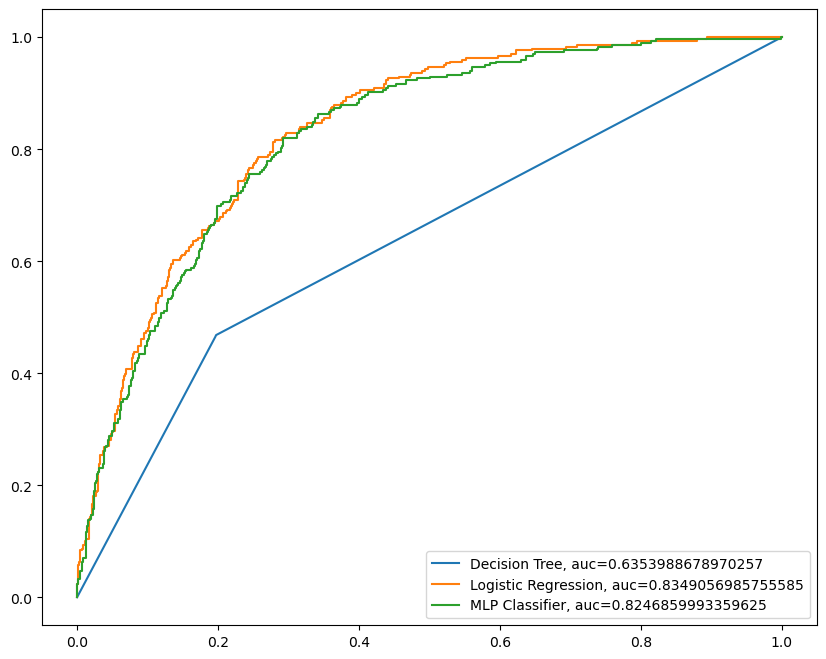

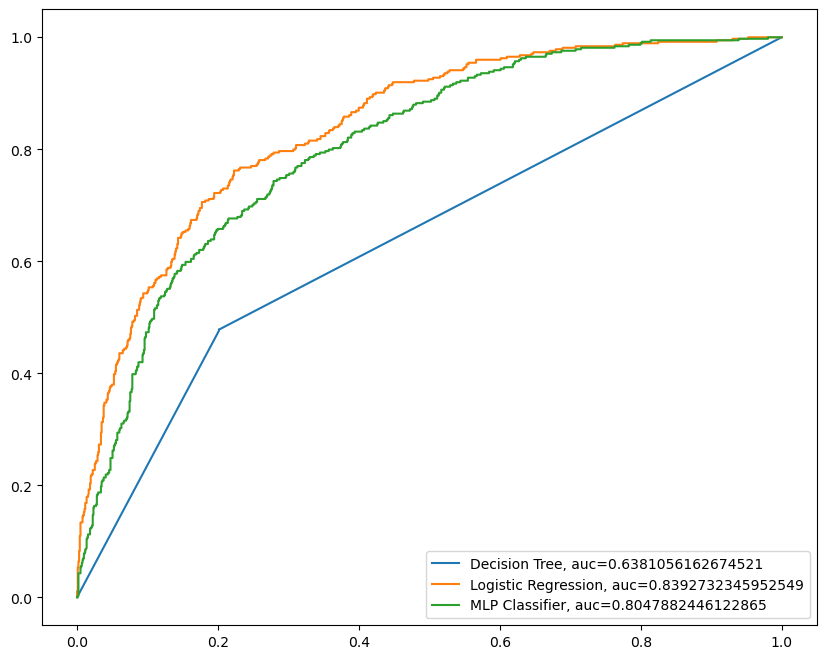

In [55]:
# Plot ROC curves

from sklearn.metrics import roc_curve, roc_auc_score

## CODE HERE ##
y_pred_proba_dt = clf_dt.predict_proba(X_val)[:,1]
y_pred_proba_lr = clf_lr.predict_proba(X_val)[:,1]
y_pred_proba_mlp = clf_mlp.predict_proba(X_val)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_pred_proba_lr)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_pred_proba_mlp)

auc_dt = roc_auc_score(y_val, y_pred_proba_dt)
auc_lr = roc_auc_score(y_val, y_pred_proba_lr)
auc_mlp = roc_auc_score(y_val, y_pred_proba_mlp)

plt.figure(figsize=(10,8))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree, auc="+str(auc_dt))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression, auc="+str(auc_lr))
plt.plot(fpr_mlp, tpr_mlp, label="MLP Classifier, auc="+str(auc_mlp))
plt.legend(loc=4)
plt.show()

y_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]
y_pred_proba_lr = clf_lr.predict_proba(X_test)[:,1]
y_pred_proba_mlp = clf_mlp.predict_proba(X_test)[:,1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)

auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)

plt.figure(figsize=(10,8))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree, auc="+str(auc_dt))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression, auc="+str(auc_lr))
plt.plot(fpr_mlp, tpr_mlp, label="MLP Classifier, auc="+str(auc_mlp))
plt.legend(loc=4)
plt.show()

(c) **[4 pts]** Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

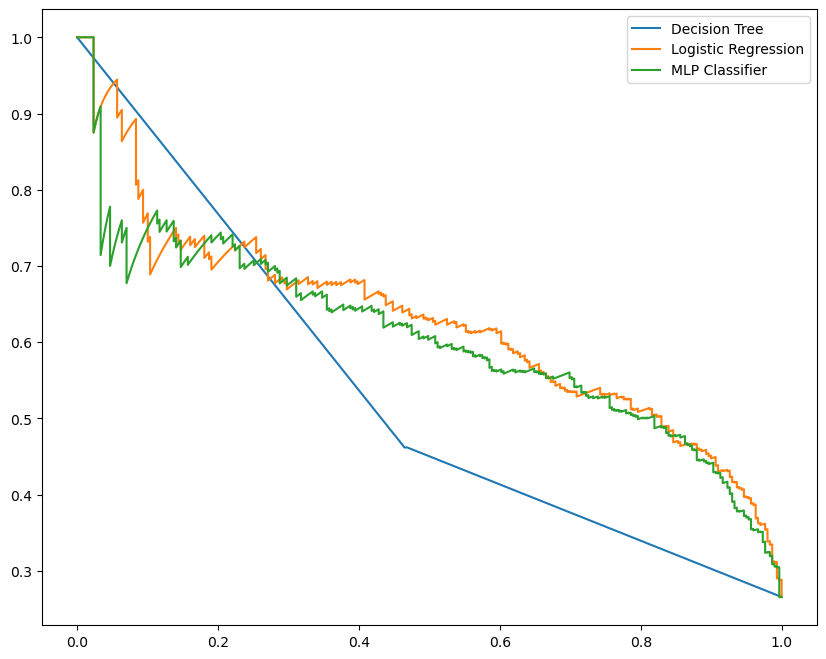

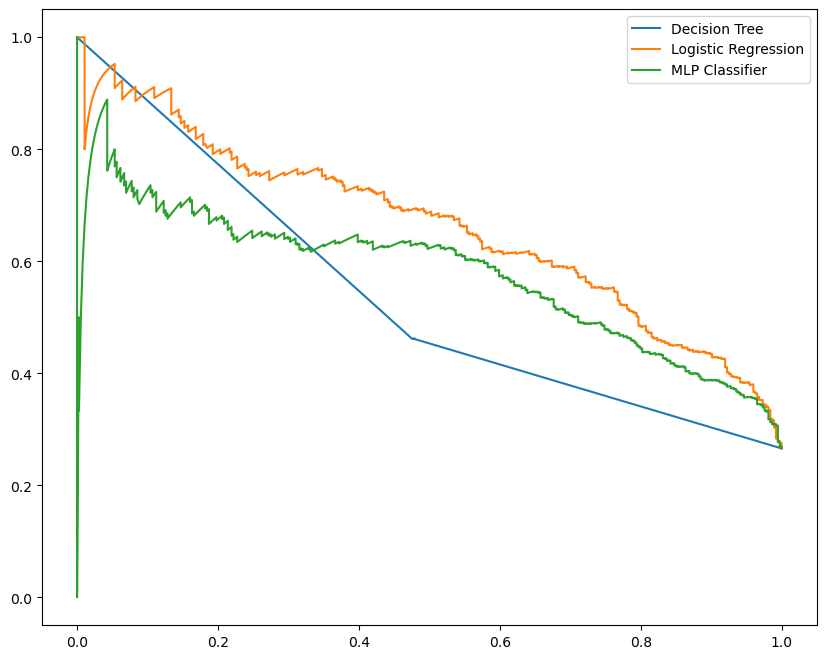

In [56]:
# Plot Precision-Recall curves

from sklearn.metrics import precision_recall_curve

## CODE HERE ##

y_pred_proba_dt = clf_dt.predict_proba(X_val)[:,1]
y_pred_proba_lr = clf_lr.predict_proba(X_val)[:,1]
y_pred_proba_mlp = clf_mlp.predict_proba(X_val)[:,1]

precision_dt, recall_dt, _ = precision_recall_curve(y_val, y_pred_proba_dt)
precision_lr, recall_lr, _ = precision_recall_curve(y_val, y_pred_proba_lr)
precision_mlp, recall_mlp, _ = precision_recall_curve(y_val, y_pred_proba_mlp)

plt.figure(figsize=(10,8))
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_mlp, precision_mlp, label="MLP Classifier")
plt.legend(loc=1)
plt.show()


y_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]
y_pred_proba_lr = clf_lr.predict_proba(X_test)[:,1]
y_pred_proba_mlp = clf_mlp.predict_proba(X_test)[:,1]

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_pred_proba_mlp)

plt.figure(figsize=(10,8))
plt.plot(recall_dt, precision_dt, label="Decision Tree")
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_mlp, precision_mlp, label="MLP Classifier")
plt.legend(loc=1)
plt.show()

